# Overview

TDB

## 1. Importing libraries



In [151]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt # plotting data
import seaborn as sns
pd.set_option('display.max_columns', None)

import re # used for text cleaning before word cloud generation 
from wordcloud import WordCloud, STOPWORDS # create wordclouds



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Loading train and test_data
data_train = pd.read_csv('./kaggle/input/nlp-getting-started/train.csv')
data_test = pd.read_csv('./kaggle/input/nlp-getting-started/test.csv')



./kaggle/input\nlp-getting-started\sample_submission.csv
./kaggle/input\nlp-getting-started\test.csv
./kaggle/input\nlp-getting-started\train.csv


## 2. Overview of data format

The training set consists of labeled data entries. Each data entry consists of 5 different columns:
1. id
2. keyword
3. location
4. text
5. target

Notes:
- Numerical data: ID, target
- Categorical data: keyword, location, text
- keyword and location has missing values (Will be handeled later)

In [152]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [153]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 2. Visualizing data




### 'keyword' column

<AxesSubplot:>

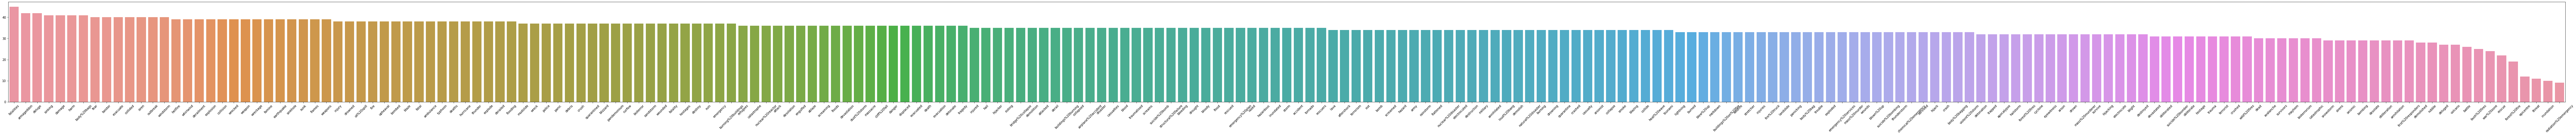

In [155]:
# counting occurences of each keyword
counts = data_train['keyword'].value_counts(dropna=False)

# Plotting counts
plt.figure(figsize=(150,6))
plt.xticks(rotation=45)
sns.barplot(x=counts.index, y=counts.values)

(-0.5, 799.5, 399.5, -0.5)

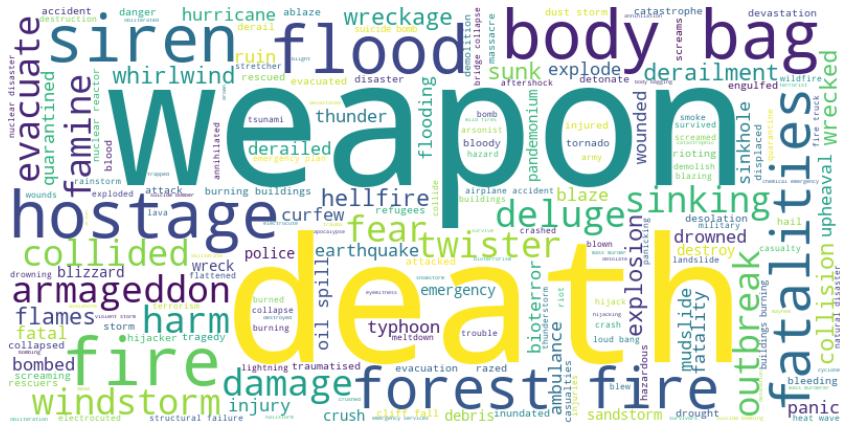

In [171]:
# Creating word cloud. NaN and empty entries need to be removed:
data_train_keyword_isval = data_train.dropna(subset = ["keyword"])
data_train_keyword_isval = data_train_keyword_isval.loc[(data_train.keyword != '')]


# Preparing text for word cloud
# Cleaning text using Regex. Replacing spaces: '%20' with '%'
text = ' '.join(data_train_keyword_isval['keyword'].sample(frac = 1)) # needs to be shuffled to avoid wordcloud conflicts with repeating words
clean_text = re.sub(r'%20', '%', text)

# Generating wordcloud
wc = WordCloud(width = 800, height = 400, background_color = 'white')
wc.generate(clean_text)
plt.figure(figsize=(15,8))
wc.generate(clean_text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

### 'location' column

In [220]:
# counting occurences of each keyword and displaying the first 50 results
counts = data_train['location'].value_counts(dropna=False)
counts[:15]

NaN                2533
USA                 104
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Mumbai               22
Washington, DC       21
Kenya                20
Worldwide            19
Australia            18
Name: location, dtype: int64

In [218]:
# Creating word cloud. NaN and empty entries need to be removed:
data_train_location_isval = data_train.dropna(subset = ["location"])
data_train_location_isval = data_train_location_isval.loc[(data_train.keyword != '')]

# creating "cleaned_location". NaN and '' values removed. Whitespace replaced with % for word cloud
cleaned_location = list(map(lambda text: re.sub(r'\s', '%', text), list(data_train_location_isval.location[:10].values)))

(-0.5, 799.5, 399.5, -0.5)

<Figure size 1080x576 with 0 Axes>

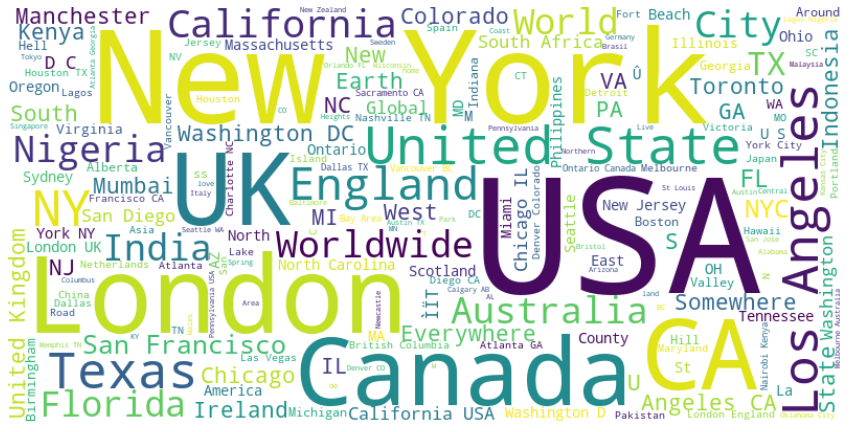

In [219]:
# Preparing text for word cloud
# Cleaning text using Regex. Replacing spaces: '%20' with '%'
text = ' '.join(data_train_location_isval['location'].sample(frac = 1)) # needs to be shuffled to avoid wordcloud conflicts with repeating words
clean_text = re.sub(r'%20', '%', text)

# Generating wordcloud
wc = WordCloud(width = 800, height = 400, background_color = 'white')
wc.generate(clean_text)
plt.figure(figsize=(15,8))
wc.generate(clean_text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

In [190]:
# calculating percentage of Nan values
print(f'data_train["keyword"] percentage of NaN = {data_train["keyword"].isna().mean()*100:.2f} %')
print(f'data_train["location"] percentage of NaN = {data_train["location"].isna().mean()*100:.2f} %')

data_train["keyword"] percentage of NaN = 0.80 %
data_train["location"] percentage of NaN = 33.27 %


## 'text' column - desaster tweets

In [224]:
desaster_data = data_train[(data_train['target'] == 1)]
text = " ".join(desaster_data['text'])

(-0.5, 799.5, 399.5, -0.5)

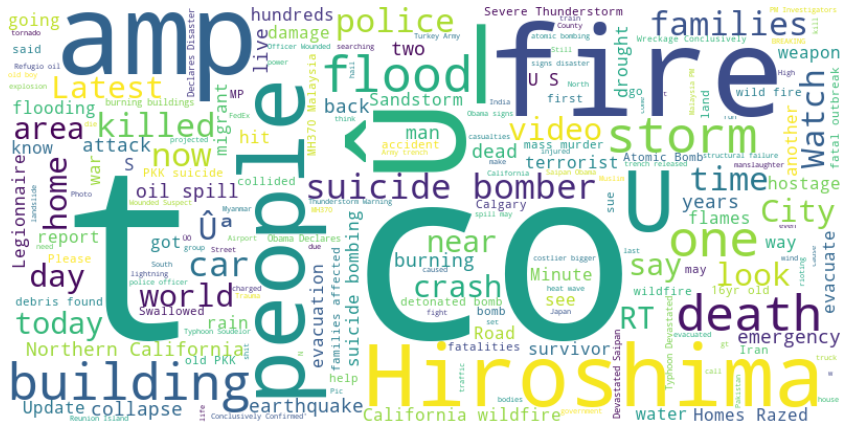

In [228]:
stopwords = set(STOPWORDS)
stopwords.update(["New", "https", "Û", "via", "will", "News", "year"])

# Generating wordcloud
wc = WordCloud(stopwords = stopwords, width = 800, height = 400, background_color = 'white')
wc.generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')